 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [ ]:
# Reading whale returns
csvpath = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic return
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
#sp500_pd.info()
sp500_pd.dtypes
sp500_pd.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Fix Data Types
sp500_pd["Close"] = sp500_pd["Close"].str.replace('$','')
#sp500_pd["Close"] = sp500_pd["Close"].str.replace(',','')
sp500_pd.head()

C:\Users\Sherb\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
sp500_pd.sort_index(inplace=True)

In [12]:
sp500_pd["Close"] = sp500_pd["Close"].astype('float64')
sp500_pd.info()
sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_df,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

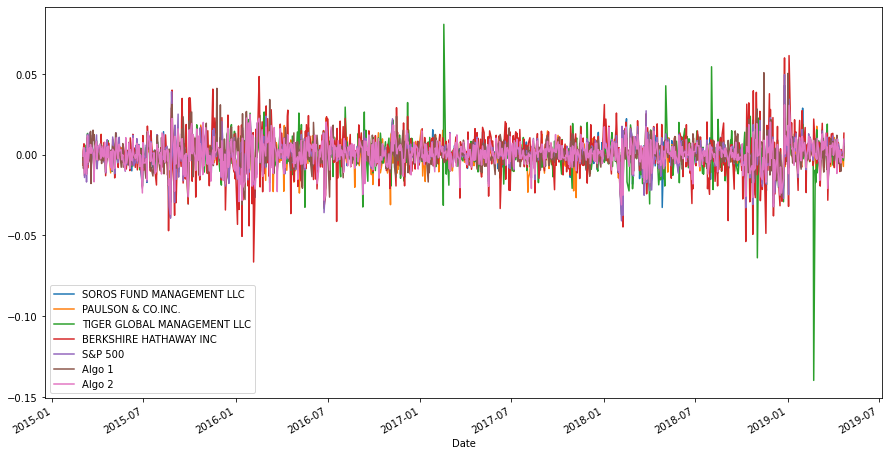

In [16]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(15,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

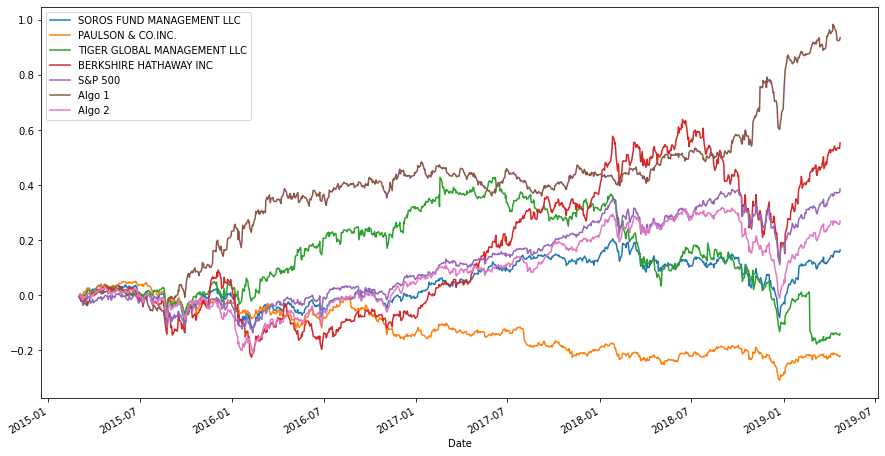

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_returns).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

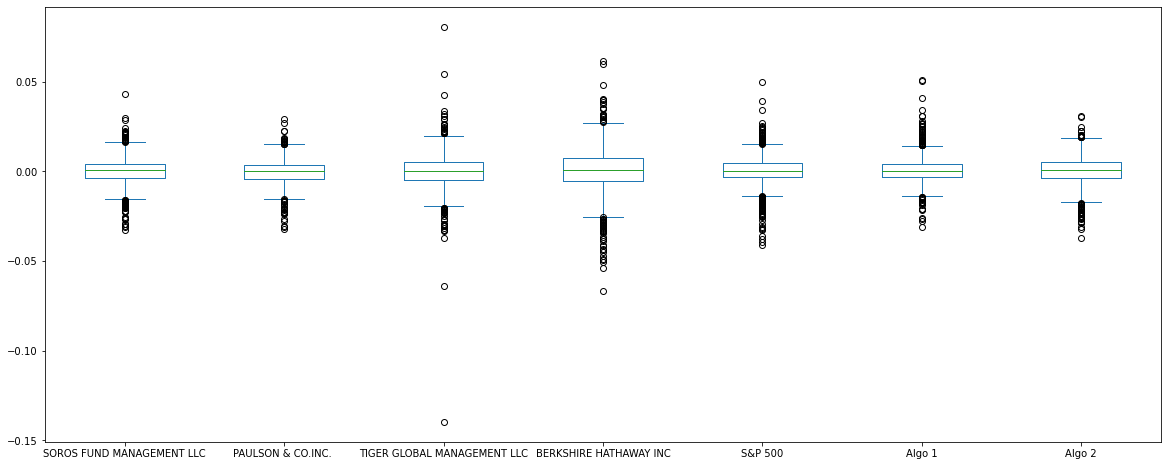

In [18]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,8))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008554
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
daily_std = sp500_pd.std()
print(daily_std)
# Determine which portfolios are riskier than the S&P 500

S&P 500    0.008111
dtype: float64


In [21]:
sp500_pd = all_returns.std['SP500 Daily Returns'].std()
all_returns.std()>sp500_std

TypeError: 'method' object is not subscriptable

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation
annualized_std = daily_std * np.sqrt(252)
annualized_std

# *im not quite sure if these are correct*

S&P 500    0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

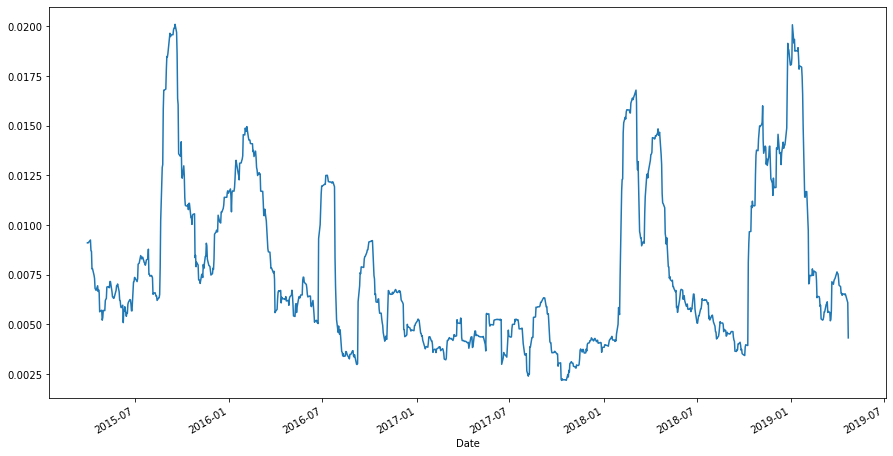

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
all_returns["S&P 500"].rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.837864,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.669732,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.623946,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.751371,0.292033,0.688082
S&P 500,0.837864,0.669732,0.623946,0.751371,1.000000,0.279494,0.858764
Algo 1,0.321211,0.268840,0.164387,0.292033,0.279494,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.858764,0.288243,1.000000


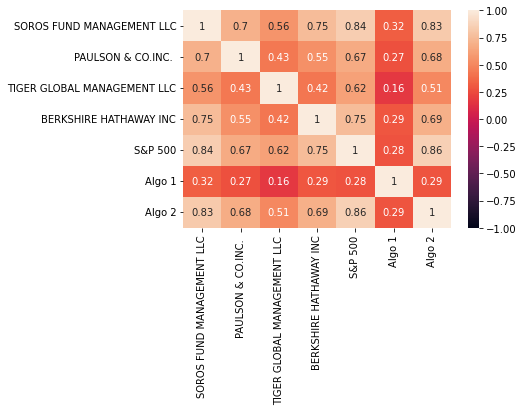

In [24]:
# Calculate the correlation
import seaborn as sns
correlation = all_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

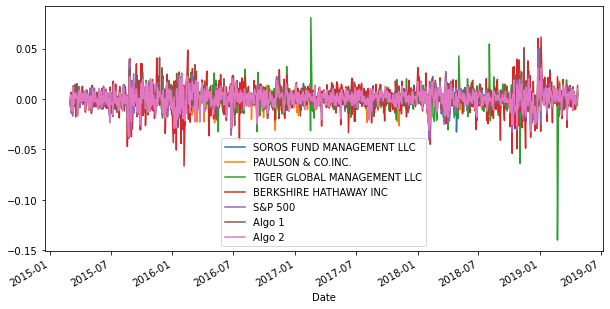

In [25]:
# Calculate covariance of a single portfolio
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
# Calculate variance of S&P 500
variance = all_returns['S&P 500'].var()
# Computing beta
algo1_beta = covariance / variance
algo1_beta
# Plot beta trend
all_returns.plot(figsize=(10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

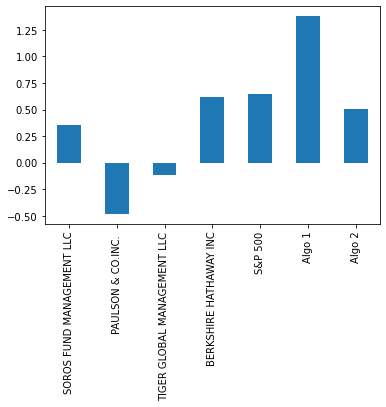

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

it does outperform both

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
goog_csv = Path("../Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

In [ ]:
# Reading data from 2nd stock
aapl_csv = Path("../Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)

In [ ]:
# Reading data from 3rd stock
cost_csv = Path("../Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)

In [28]:
# Combine all stocks in a single DataFrame
tickers = ['aapl','cost','goog']
combined_df = None
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"./Resources/{ticker}_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Trade DATE", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined_df = pd.concat([combined_df,ticker_df], axis="columns", join="inner")
    
print(combined_df.head())
print(combined_df.tail())

                AAPL      COST      GOOG
Date                                    
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
                AAPL      COST      GOOG
Date                                    
2019-05-03  0.012431  0.007953  0.019602
2019-05-06 -0.015443 -0.001594  0.003366
2019-05-07 -0.026957 -0.016583 -0.012855
2019-05-08  0.000197  0.004830 -0.006669
2019-05-09 -0.010744  0.008826 -0.003335


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs
combined_df.dropna(inplace=True)
# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [29]:
# Set weights
weights = [1/3, 1/3, 1/3]
weighted_returns = combined_df.dot(weights)
weighted_returns.columns = ['Custom']
print(weighted_returns.columns)
print(weighted_returns.head())
# Calculate portfolio return

# Display sample data


['Custom']
Date
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [30]:
# Join your returns DataFrame to the original returns DataFrame
new_df = pd.concat([all_returns,weighted_returns], axis="columns", join="inner")
#new_combined_df.rename(columns={0,"Custom"}, inplace=True)
new_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,0
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.001708,0.000358,0.000281,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000884,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.004061,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.006949,0.005205,-0.001595


In [31]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_df.dropna(inplace=True)
print(new_df.tail())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  \
Date                                                                        
2019-04-16                    -0.000831                0.000837  0.000509   
2019-04-17                    -0.004409                0.003222 -0.002274   
2019-04-18                     0.000582                0.001916  0.001579   
2019-04-22                    -0.003640               -0.001088  0.001012   
2019-04-23                     0.006472                0.013278  0.008841   

              Algo 1    Algo 2  

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized `std`
new_df.std()
annualized_variance_pt2 = (new_df.var()*252)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
S&P 500                        0.152054
Algo 1                         0.133704
Algo 2                         0.139556
0                              0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

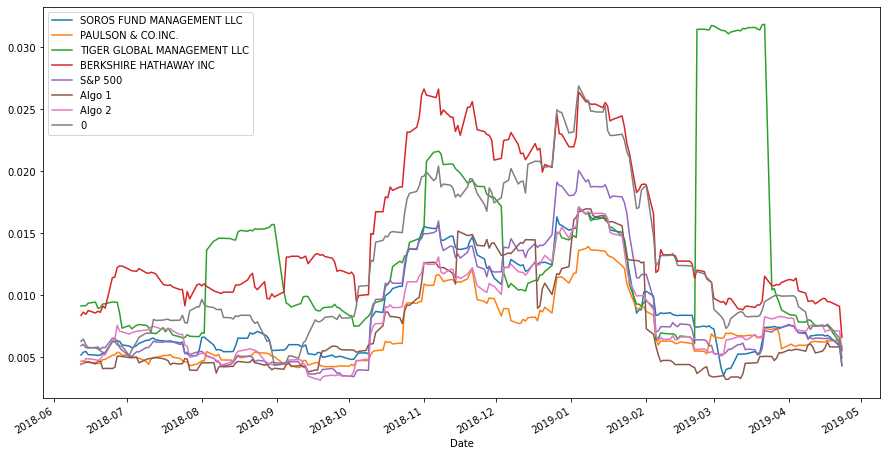

In [33]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
new_df.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [34]:
#not too good with the custom portfolio. 
print('i tried my best')

i tried my best
